In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
from tqdm import tqdm
from pprint import pprint
tqdm.pandas()
df = pd.read_csv("applications.csv")
df.Community_URL__c = "https://connect.pharmac.govt.nz" + df.Community_URL__c
df

,Id,Name,Applications__c,Brand_Name__c,Chemical_Name__c,Applicants__c,Funding_requested_for__c,Stage__c,Pharmaceutical__c,Community_URL__c,Therapeutic_group__c
0,a0ROZ000009J5Ev2AK,15-valent pneumococcal conjugate vaccine (PCV15),A-04423,VAXNEUVANCE.,15-valent pneumococcal conjugate vaccine (PCV15),MERCK SHARP & DOHME (NEW ZEALAND) LIMITED,Prevention of invasive pneumococcal disease,Decision,15-valent pneumococcal conjugate vaccine (PCV1...,https://connect.pharmac.govt.nz/apptracker/s/a...,NaN
1,a0ROZ000004CX2l2AG,Adjuvanted inactivated quadrivalent influenza ...,A-03341,FLUAD® QUAD,Adjuvanted inactivated quadrivalent influenza ...,Seqirus,influenza vaccination for people aged 65 years...,Decision,Adjuvanted inactivated quadrivalent influenza ...,https://connect.pharmac.govt.nz/apptracker/s/a...,National Immunisation Schedule
2,a0ROZ00000Cn1xE2AR,Adjuvanted inactivated trivalent influenza vac...,A-00724,Fluad,Adjuvanted inactivated trivalent influenza vac...,Seqirus,Influenza vaccine for people 65 years of age a...,Options Compared,Adjuvanted inactivated trivalent influenza vac...,https://connect.pharmac.govt.nz/apptracker/s/a...,National Immunisation Schedule
3,a0R2P000000gVYDUA2,Bevacizumab and Human Papillomavirus (HPV) vac...,A-00655,NaN,Bevacizumab and Human Papillomavirus (HPV) vac...,PHARMAC Initiated,Recurrent respiratory papillomatosis,Decision,Bevacizumab and Human Papillomavirus (HPV) vac...,https://connect.pharmac.govt.nz/apptracker/s/a...,Respiratory System and Allergies
4,a0R2P000000LmcWUAS,Diphtheria and tetanus vaccine,A-00221,NaN,Diphtheria and tetanus vaccine,PHARMAC Initiated,Widening of access,Decision,Diphtheria and tetanus vaccine,https://connect.pharmac.govt.nz/apptracker/s/a...,National Immunisation Schedule
...,...,...,...,...,...,...,...,...,...,...,...
2010,a0ROZ00000083aG2AQ,AEON Sodium Chloride 5 Percent,A-04432,AEON,AEON Sodium Chloride 5 Percent,MEDIX 21 LIMITED,Corneal oedema relief,Seeking Clinical Advice,AEON Sodium Chloride 5 Percent (AEON),https://connect.pharmac.govt.nz/apptracker/s/a...,NaN
2011,a0ROZ00000DqVYD2A3,Pegunigalsidase alfa-iwxj,A-05325,ELFABRIO,Pegunigalsidase alfa-iwxj,CHIESI NEW ZEALAND LIMITED,Fabry Disease,Options Compared,Pegunigalsidase alfa-iwxj (ELFABRIO),https://connect.pharmac.govt.nz/apptracker/s/a...,NaN
2012,a0ROZ000003nufF2AQ,Elemental Food (Elemental Gold),A-04296,It is not a pharmaceutical. The brand name is ...,Elemental Food (Elemental Gold),ENDOTHERAPEUTICS NZ LIMITED,Currently funded indications,Seeking Clinical Advice,Elemental Food (Elemental Gold) (It is not a p...,https://connect.pharmac.govt.nz/apptracker/s/a...,NaN
2013,a0ROZ00000AQkoE2AT,SARS-CoV-2 rS (Omicron XBB.1.5),A-04785,NUVAXOVID XBB.1.5,SARS-CoV-2 rS (Omicron XBB.1.5),BIOCELECT NEW ZEALAND LIMITED,prevention of COVID-19,Options Compared,SARS-CoV-2 rS (Omicron XBB.1.5) (NUVAXOVID XBB...,https://connect.pharmac.govt.nz/apptracker/s/a...,NaN


In [2]:
events = pd.read_json(f"applications/{df['Id'].iloc[0]}.json").dropna()
events

,text,position,name,last,events,dateString,collapsed,checked
0,<p>New funding applications are referred to on...,0,Application Received,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Aug 2022,False,True
1,<p>Pharmac is identifying and gathering inform...,1,Seeking Clinical Advice,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Sep 2022,False,True
2,"<p>Following Clinical Advice, Pharmac staff co...",2,Under Assessment,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Mar 2023,False,True
3,<p>Pharmac staff uses a prioritisation process...,3,Options Compared,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Jun 2024,False,True
4,<p>Pharmac is consulting on a proposal to eith...,4,Under Consultation,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Oct 2024,False,True
5,"<p>Following the consultation process, Pharmac...",5,Reviewing Consultation Feedback,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Nov 2024,False,True
6,<p>We refer to our decisions about whether and...,6,Decision,True,"[{'Summary': {'s': None, 'fs': None, 'change':...",Jun 2025,False,True


In [3]:
days_until_each_stage = pd.to_datetime(events.set_index("name").dateString.dropna(), errors="coerce").diff().dropna()
days_until_each_stage.index = "Days until " + days_until_each_stage.index
days_until_each_stage

/tmp/ipykernel_116943/985086398.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  days_until_each_stage = pd.to_datetime(events.set_index("name").dateString.dropna(), errors="coerce").diff().dropna()


name
Days until Seeking Clinical Advice            31 days
Days until Under Assessment                  181 days
Days until Options Compared                  458 days
Days until Under Consultation                122 days
Days until Reviewing Consultation Feedback    31 days
Days until Decision                          212 days
Name: dateString, dtype: timedelta64[ns]

In [4]:
pprint(events.events.iloc[-1])

[{'Event_Description': {'change': None,
                        'fs': 'The funding application has been declined.',
                        's': 'The funding application has been declined.'},
  'Formatted_Date': {'change': None, 'fs': 'Jun 2025', 's': 'Jun 2025'},
  'Links': {'change': None,
            'fs': '<p><a '
                  'href="https://www.pharmac.govt.nz/news-and-resources/consultations-and-decisions/2025-06-decision-to-decline-inactive-applications-for-the-funding-of-some-medicines" '
                  'target="_blank">Notification of the decision</a></p>',
            's': '<p><a '
                 'href="https://www.pharmac.govt.nz/news-and-resources/consultations-and-decisions/2025-06-decision-to-decline-inactive-applications-for-the-funding-of-some-medicines" '
                 'target="_blank">Notification of the decision</a></p>'},
  'Outcome': {'change': None, 'fs': None, 's': None},
  'PTAC_Comments': {'change': None, 'fs': None, 's': None},
  'Published_Applic

In [5]:
rows = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    events = pd.read_json(f"applications/{row.Id}.json").dropna()
    start = pd.to_datetime(events.events.iloc[0][0]["e"]["Event_Date__c"])
    end = pd.to_datetime(events.events.iloc[-1][0]["e"]["Event_Date__c"])
    delta = end - start
    row = row.to_dict()
    row["Application Received date"] = start
    row["Last Update date"] = end
    row["Days elapsed between application and last update"] = delta.days
    days_until_each_stage = pd.to_datetime(events.set_index("name").dateString.dropna(), errors="coerce", format="%b %Y").diff().dropna()
    days_until_each_stage.index = "Days until " + days_until_each_stage.index
    row.update(days_until_each_stage)
    for stage in events.events:
        stage_events = []
        for event in stage:
            try:
                stage_events.append(event["e"]["Event_Date__c"] + ":" + event["e"]["Event_Description__c"])
            except KeyError:
                print(event)
        row[event["e"]["Stage__c"] + " dates"] = "\r\n".join(stage_events)
    rows.append(row)

df = pd.DataFrame(rows)
df.sort_values("Application Received date", inplace=True)
df

  0%|          | 0/2015 [00:00<?, ?it/s]

 15%|█▌        | 310/2015 [00:01<00:08, 199.17it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Jul 2012', 'fs': 'Jul 2012', 'change': None}, 'Event_Description': {'s': None, 'fs': None, 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0POZ000000vYNw2AM'}, 'Id': 'a0POZ000000vYNw2AM', 'Event_Date__c': '2012-07-01', 'Stage__c': 'Under Assessment', 'Formatted_Date__c': 'Jul 2012', 'Status_History__c': 'a132P000000Aq3yQAC'}, 'change': None}


 41%|████      | 828/2015 [00:04<00:05, 199.27it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Dec', 'fs': 'Dec', 'change': None}, 'Event_Description': {'s': 'Public consultation for this application is now closed. Pharmac is reviewing consultation feedback.', 'fs': 'Public consultation for this application is now closed. Pharmac is reviewing consultation feedback.', 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0P2P000007JyAAUA0'}, 'Id': 'a0P2P000007JyAAUA0', 'Event_Description__c': 'Public consultation for this application is now closed. Pharmac is reviewing consul

 56%|█████▌    | 1120/2015 [00:05<00:04, 196.13it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Aug 2022', 'fs': 'Aug 2022', 'change': None}, 'Event_Description': {'s': None, 'fs': None, 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0POZ0000012oZf2AI'}, 'Id': 'a0POZ0000012oZf2AI', 'Event_Date__c': '2022-08-01', 'Stage__c': 'Seeking Clinical Advice', 'Formatted_Date__c': 'Aug 2022', 'Status_History__c': 'a132P000000DwrGQAS'}, 'change': None}


 71%|███████   | 1423/2015 [00:07<00:03, 186.31it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': '<p>The Committee recommended the new formulation and device of adalimumab be listed on the Pharmaceutical Schedule if cost-neutral to the existing presentations of adalimumab, including the future costs of adalimumab with regards to patent extension and the introduction of biosimilar presentations.</p><p><br></p><p>The Committee took into account, where applicable, PHARMAC&#39;s relevant decision-making framework for these recommendations.</p>', 'fs': '<p>The Committee recommended the new formulation and device of adalimumab be listed on the Pharmaceutical Schedule if cost-neutral to the existing presentations of adalimumab, including the future costs of adalimumab with regards to patent extension and the introduction of biosimilar presentations.</p><p><br></p><p>The Committee took into account, where applicable, PHARMAC&#39;s relevant decision-making framework for these recommendations.</p>', 'chan

 82%|████████▏ | 1650/2015 [00:08<00:01, 185.29it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Oct 2017', 'fs': 'Oct 2017', 'change': None}, 'Event_Description': {'s': None, 'fs': None, 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0POZ0000032tQR2AY'}, 'Id': 'a0POZ0000032tQR2AY', 'Event_Date__c': '2017-10-12', 'Stage__c': 'Options Compared', 'Formatted_Date__c': 'Oct 2017', 'Status_History__c': 'a132P000000ArLkQAK'}, 'change': None}


 90%|████████▉ | 1810/2015 [00:09<00:01, 186.08it/s]

{'Summary': {'s': '<p>A summary of provisional recommendations from the June 10 2025 Rare Disorders Committee meeting has been published. Within the context of treatments for rare disorders, Garadacimab was recommended with a <strong>High Priority</strong> for the treatment of hereditary angioedema, subject to Special Authority criteria.</p>', 'fs': '<p>A summary of provisional recommendations from the June 10 2025 Rare Disorders Committee meeting has been published. Within the context of treatments for rare disorders, Garadacimab was recommended with a <strong>High Priority</strong> for the treatment of hereditary angioedema, subject to Special Authority criteria.</p>', 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': 

 93%|█████████▎| 1868/2015 [00:09<00:00, 187.35it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Dec 2012', 'fs': 'Dec 2012', 'change': None}, 'Event_Description': {'s': None, 'fs': None, 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0P2P000002ztraUAA'}, 'Id': 'a0P2P000002ztraUAA', 'Event_Date__c': '2012-12-01', 'Stage__c': 'Seeking Clinical Advice', 'Formatted_Date__c': 'Dec 2012', 'Status_History__c': 'a132P000000AqG0QAK'}, 'change': None}


 99%|█████████▊| 1985/2015 [00:10<00:00, 190.20it/s]

{'Summary': {'s': None, 'fs': None, 'change': None}, 'Published_Recommendation': {'s': None, 'fs': None, 'change': None}, 'Published_Discussion': {'s': None, 'fs': None, 'change': None}, 'Published_Application': {'s': None, 'fs': None, 'change': None}, 'PTAC_Comments': {'s': None, 'fs': None, 'change': None}, 'Outcome': {'s': None, 'fs': None, 'change': None}, 'Links': {'s': None, 'fs': None, 'change': None}, 'Formatted_Date': {'s': 'Jun 2013', 'fs': 'Jun 2013', 'change': None}, 'Event_Description': {'s': None, 'fs': None, 'change': None}, 'e': {'attributes': {'type': 'Application_Event__c', 'url': '/services/data/v65.0/sobjects/Application_Event__c/a0POZ00000F3gLZ2AZ'}, 'Id': 'a0POZ00000F3gLZ2AZ', 'Event_Date__c': '2013-06-01', 'Stage__c': 'Options Compared', 'Formatted_Date__c': 'Jun 2013', 'Status_History__c': 'a132P000000AqQ1QAK'}, 'change': None}


100%|██████████| 2015/2015 [00:10<00:00, 192.92it/s]


,Id,Name,Applications__c,Brand_Name__c,Chemical_Name__c,Applicants__c,Funding_requested_for__c,Stage__c,Pharmaceutical__c,Community_URL__c,Therapeutic_group__c,Application Received date,Last Update date,Days elapsed between application and last update,Days until Seeking Clinical Advice,Days until Under Assessment,Days until Options Compared,Days until Under Consultation,Days until Reviewing Consultation Feedback,Days until Decision,Application Received dates,Seeking Clinical Advice dates,Under Assessment dates,Options Compared dates,Under Consultation dates,Reviewing Consultation Feedback dates,Decision dates
688,a0R2P000000LmkWUAS,Risperidone tablets,A-01127,Risperdal,Risperidone tablets,Janssen,Schizophrenia,Decision,Risperidone tablets (Risperdal),https://connect.pharmac.govt.nz/apptracker/s/a...,Nervous System,1994-04-01,1995-10-01,548,0 days,244 days,-91 days,NaT,NaT,395 days,1994-04-01:Application received,1994-04-01:Clinical advice required\r\n1994-06...,1994-12-01:Working to compare options\r\n1995-...,1994-09-01:The relative ranking of the pharmac...,NaN,NaN,1995-10-01:The funding application has been Ap...
584,a0R2P000000LmjmUAC,Gabapentin,A-01197,Neurontin,Gabapentin,Parke Davis,Partial seizures in patients who have not achi...,Decision,Gabapentin (Neurontin),https://connect.pharmac.govt.nz/apptracker/s/a...,Nervous System,1994-08-01,2001-03-01,2404,184 days,28 days,61 days,2072 days,NaT,59 days,1994-08-01:Application received,1995-02-01:Clinical advice required\r\n1995-03...,1995-03-01:Working to compare options,1995-05-01:The relative ranking of the pharmac...,2001-01-01:Public consultation for this applic...,NaN,2001-03-01:The funding application has been Ap...
982,a0R2P000000LmThUAK,Somatropin - Growth Hormone,A-01165,Genotropin,Somatropin - Growth Hormone,Clinician,Adult and adolescent patients with growth ho...,Decision,Somatropin - Growth Hormone (Genotropin),https://connect.pharmac.govt.nz/apptracker/s/a...,Hormone Preparations - Systemic Excluding Cont...,1995-09-01,2005-09-01,3653,0 days,427 days,-366 days,5083 days,NaT,-1491 days,1995-09-01:Application received,1995-09-01:Clinical advice required\r\n1995-11...,1996-11-01:Working to compare options,1995-11-01:The relative ranking of the pharmac...,2009-10-01:Public consultation for this applic...,NaN,2005-09-01:The funding application has been Ap...
593,a0R2P000000Lmo2UAC,Interferon beta-1-beta,A-01183,Betaferon,Interferon beta-1-beta,Bayer,Relapsing remitting multiple sclerosis,Decision,Interferon beta-1-beta (Betaferon),https://connect.pharmac.govt.nz/apptracker/s/a...,Nervous System,1996-01-01,1999-07-01,1277,0 days,NaT,1216 days,0 days,NaT,61 days,1996-01-01:Application received,1996-01-01:Clinical advice required\r\n1996-03...,NaN,1999-05-01:The relative ranking of the pharmac...,1999-05-01:Public consultation for this applic...,NaN,1999-07-01:The funding application has been Ap...
1407,a0R2P000000LmqWUAS,Anastrozole,A-01169,Arimidex,Anastrozole,AstraZeneca,Third line treatment of advanced breast cancer,Decision,Anastrozole (Arimidex),https://connect.pharmac.govt.nz/apptracker/s/a...,Oncology Agents and Immunosuppressants,1997-02-01,1998-12-01,668,0 days,89 days,518 days,0 days,NaT,61 days,1997-02-01:Application received,1997-02-01:Clinical advice required\r\n1997-05...,1997-05-01:Working to compare options,1998-10-01:The relative ranking of the pharmac...,1998-10-01:Public consultation for this applic...,NaN,1998-12-01:The funding application has been Ap...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,a0ROZ00000Dms532AB,Riociguat,A-05544,ADEMPAS,Riociguat,Clinician,Chronic Thromboembolic Pulmonary Hypertension ...,Seeking Clinical Advice,Riociguat (ADEMPAS),https://connect.pharmac.govt.nz/apptracker/s/a...,NaN,2025-10-28,2026-02-02,97,123 days,NaT,NaT,NaT,NaT,NaT,2025-10-28:Application received,2026-02-02:Clinical advice required,NaN,NaN,NaN,NaN,NaN
1770,a0ROZ00000DL1uT2AT,Mepoli

In [6]:
df.describe()

,Application Received date,Last Update date,Days elapsed between application and last update,Days until Seeking Clinical Advice,Days until Under Assessment,Days until Options Compared,Days until Under Consultation,Days until Reviewing Consultation Feedback,Days until Decision
count,2015,2015,2015.000000,1944,1549,1551,1398,1120,1480
mean,2014-05-26 13:35:24.267990016,2018-03-16 14:57:35.285359872,1390.057072,140 days 12:11:06.666666666,424 days 09:19:38.308586184,296 days 00:48:16.711798840,783 days 18:53:02.832618024,66 days 14:38:08.571428571,156 days 07:05:11.351351352
min,1994-04-01 00:00:00,1995-10-01 00:00:00,-94.000000,-2557 days +00:00:00,-2162 days +00:00:00,-6087 days +00:00:00,-6270 days +00:00:00,-671 days +00:00:00,-7215 days +00:00:00
25%,2011-01-01 00:00:00,2013-04-24 00:00:00,485.000000,0 days 00:00:00,28 days 00:00:00,0 days 00:00:00,31 days 00:00:00,28 days 00:00:00,31 days 00:00:00
50%,2013-12-02 00:00:00,2019-07-11 00:00:00,866.000000,61 days 00:00:00,213 days 00:00:00,122 days 00:00:00,334 days 00:00:00,30 days 00:00:00,61 days 00:00:00
75%,2019-04-07 12:00:00,2024-03-29 00:00:00,1844.500000,181 days 00:00:00,427 days 00:00:00,396 days 00:00:00,1126 days 00:00:00,31 days 00:00:00,151 days 00:00:00
max,2026-01-14 00:00:00,2026-02-11 00:00:00,9922.000000,4626 days 00:00:00,7946 days 00:00:00,5875 days 00:00:00,7975 days 00:00:00,7184 days 00:00:00,6515 days 00:00:00
std,NaN,NaN,1372.478161,381 days 02:19:44.749732920,836 days 23:06:13.989561008,818 days 06:10:48.919041072,1243 days 22:09:53.186913056,431 days 09:08:11.626936856,681 days 08:41:04.928734328


In [7]:
df.Therapeutic_group__c.value_counts().head(20)

Therapeutic_group__c
Oncology Agents and Immunosuppressants                              431
Nervous System                                                      250
Alimentary Tract and Metabolism                                     181
Infections - Agents for Systemic Use                                162
Blood and Blood Forming Organs                                      100
Dermatologicals                                                      98
Cardiovascular System                                                92
Special Foods                                                        89
Respiratory System and Allergies                                     85
National Immunisation Schedule                                       84
Musculoskeletal System                                               76
Hormone Preparations - Systemic Excluding Contraceptive Hormones     53
Genito-Urinary System                                                51
Sensory Organs                             

In [8]:
df.Applicants__c.value_counts().head(20)

Applicants__c
Clinician                               495
PHARMAC Initiated                       385
Subcommittee recommendation              57
Roche                                    47
Consumer                                 45
Novartis                                 42
Merck Sharp & Dohme                      40
Janssen                                  38
NPPA                                     32
AstraZeneca                              31
Nutricia                                 29
Pharmac Initiated                        24
GLAXOSMITHKLINE NZ LIMITED               23
Pfizer                                   23
ROCHE PRODUCTS (NEW ZEALAND) LIMITED     22
GlaxoSmithKline                          21
ABBVIE LIMITED                           20
Gilead Sciences                          20
Boehringer Ingelheim                     19
ASTRAZENECA LIMITED                      18
Name: count, dtype: int64

<Axes: xlabel='Stage__c'>

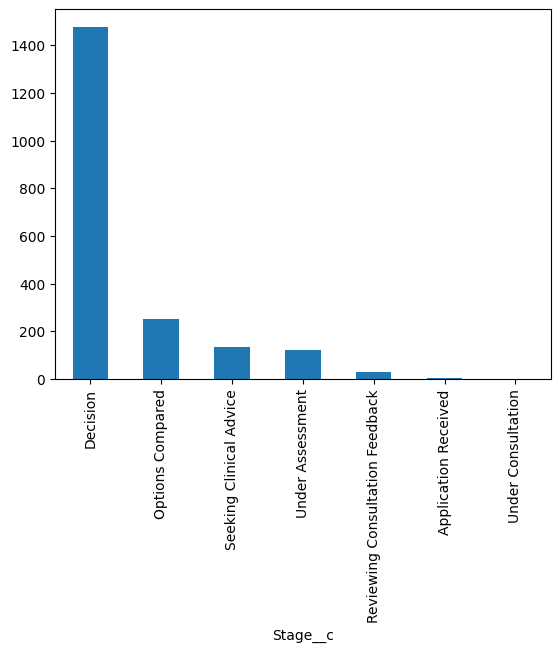

In [9]:
df.Stage__c.value_counts().plot.bar()

In [10]:
df.to_excel("Pharmac applications.xlsx", index=False)

<Axes: title={'center': 'Number of applications last updated per month'}, xlabel='Last Update date'>

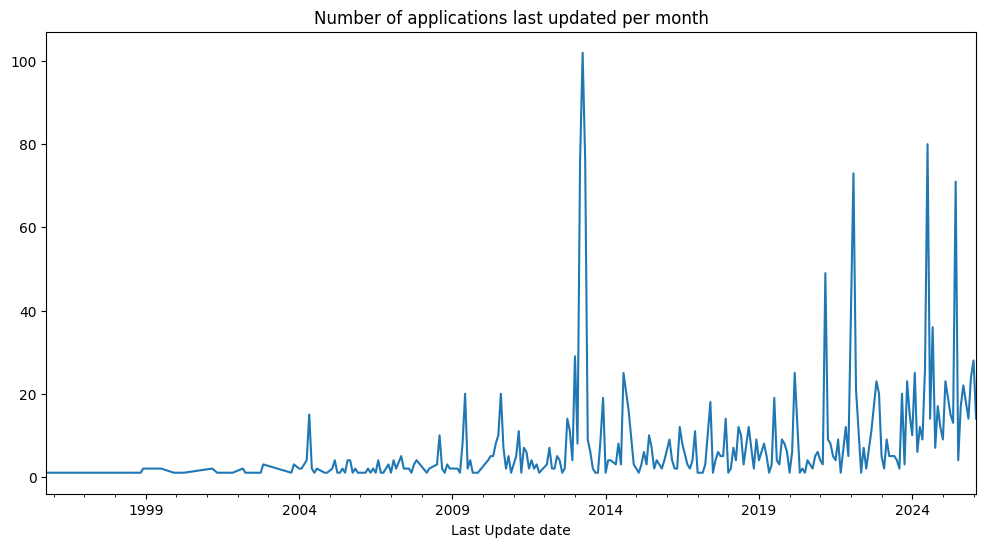

In [11]:
df["Last Update date"].groupby(df["Last Update date"].dt.to_period("M")).count().plot(figsize=(12, 6), title="Number of applications last updated per month")

<Axes: title={'center': 'Number of applications received per month'}, xlabel='Application Received date'>

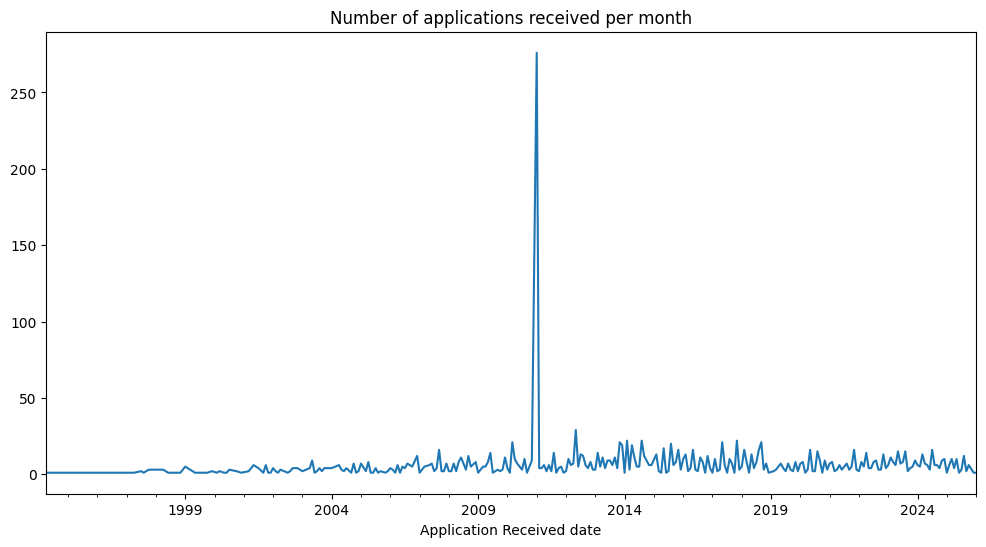

In [12]:
df["Application Received date"].groupby(df["Application Received date"].dt.to_period("M")).count().plot(figsize=(12, 6), title="Number of applications received per month")

In [13]:
df["Application Received date"].value_counts()

Application Received date
2011-01-01    276
2012-05-01     27
2014-08-01     21
2013-11-01     20
2010-03-01     18
             ... 
2016-11-08      1
2016-11-07      1
2016-11-01      1
2016-10-18      1
2026-01-14      1
Name: count, Length: 790, dtype: int64

In [14]:
df["Decision dates"].dropna().str.replace("Declined", "declined").str.replace("Approved", "approved").str.split("\r\n").apply(lambda x: x[-1].split(":")[1]).value_counts()

Decision dates
The funding application has been approved.        871
The funding application has been declined.        595
The funding application has been .                 11
The funding application has been out of scope.      3
The funding application is closed.                  1
Name: count, dtype: int64

In [15]:
all_events = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    events = pd.read_json(f"applications/{row.Id}.json").dropna()
    events["id"] = row.Id
    all_events.append(events)
events = pd.concat(all_events)
events

100%|██████████| 2015/2015 [00:06<00:00, 295.09it/s]


,text,position,name,last,events,dateString,collapsed,checked,id
0,<p>New funding applications are referred to on...,0,Application Received,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Apr 1994,False,True,a0R2P000000LmkWUAS
1,<p>Pharmac is identifying and gathering inform...,1,Seeking Clinical Advice,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Apr 1994,False,True,a0R2P000000LmkWUAS
2,"<p>Following Clinical Advice, Pharmac staff co...",2,Under Assessment,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Dec 1994,False,True,a0R2P000000LmkWUAS
3,<p>Pharmac staff uses a prioritisation process...,3,Options Compared,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Sep 1994,False,True,a0R2P000000LmkWUAS
6,<p>We refer to our decisions about whether and...,6,Decision,True,"[{'Summary': {'s': None, 'fs': None, 'change':...",Oct 1995,False,True,a0R2P000000LmkWUAS
...,...,...,...,...,...,...,...,...,...
1,<p>Pharmac is identifying and gathering inform...,1,Seeking Clinical Advice,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Jan 2026,False,True,a0ROZ00000DGeA52AL
0,<p>New funding applications are referred to on...,0,Application Received,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Dec 2025,False,True,a0ROZ00000DKizt2AD
1,<p>Pharmac is identifying and gathering inform...,1,Seeking Clinical Advice,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Jan 2026,False,True,a0ROZ00000DKizt2AD
0,<p>New funding applications are referred to on...,0,Application Received,False,"[{'Summary': {'s': None, 'fs': None, 'change':...",Jan 2026,False,True,a0ROZ00000DoZ9Z2AV


In [16]:
events.date = pd.to_datetime(events.dateString, errors="coerce")
events.month = events.date.dt.to_period("M")
events.month

/tmp/ipykernel_116943/455629087.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  events.date = pd.to_datetime(events.dateString, errors="coerce")
/tmp/ipykernel_116943/455629087.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  events.date = pd.to_datetime(events.dateString, errors="coerce")
/tmp/ipykernel_116943/455629087.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  events.month = events.date.dt.to_period("M")


0    1994-04
1    1994-04
2    1994-12
3    1994-09
6    1995-10
      ...   
1    2026-01
0    2025-12
1    2026-01
0    2026-01
1    2026-02
Name: dateString, Length: 11059, dtype: period[M]

/tmp/ipykernel_116943/3830051376.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for month in pd.date_range(events.date.min(), events.date.max(), freq="M"):
/tmp/ipykernel_116943/3830051376.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  by_month = pd.DataFrame(by_month, index=pd.date_range(events.date.min(), events.date.max(), freq="M").to_period("M"))
/tmp/ipykernel_116943/3830051376.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  changing_by_month = pd.DataFrame(changing_by_month, index=pd.date_range(events.date.min(), events.date.max(), freq="M").to_period("M"))


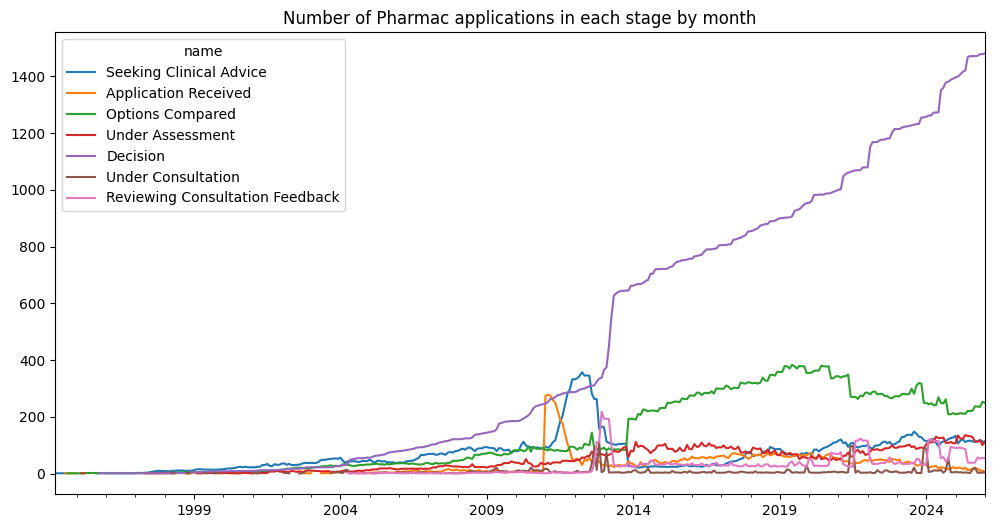

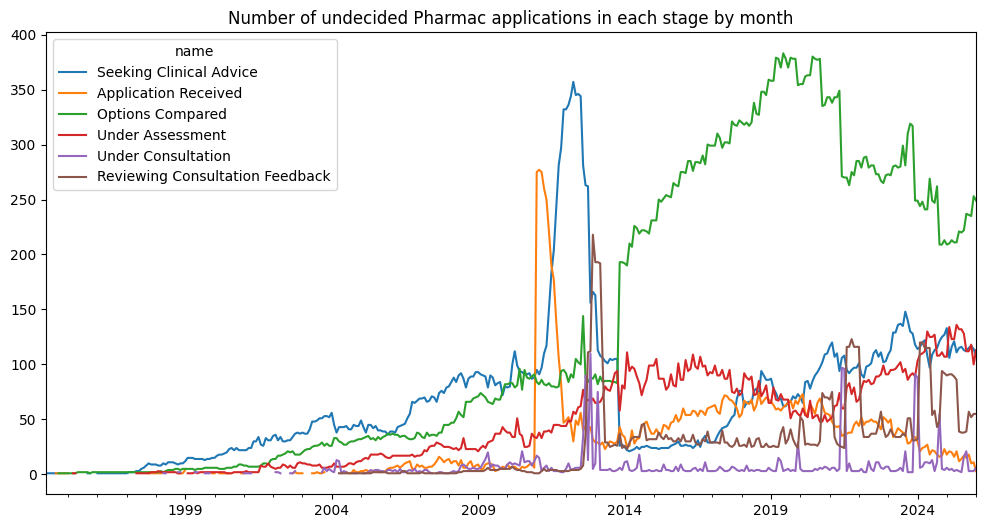

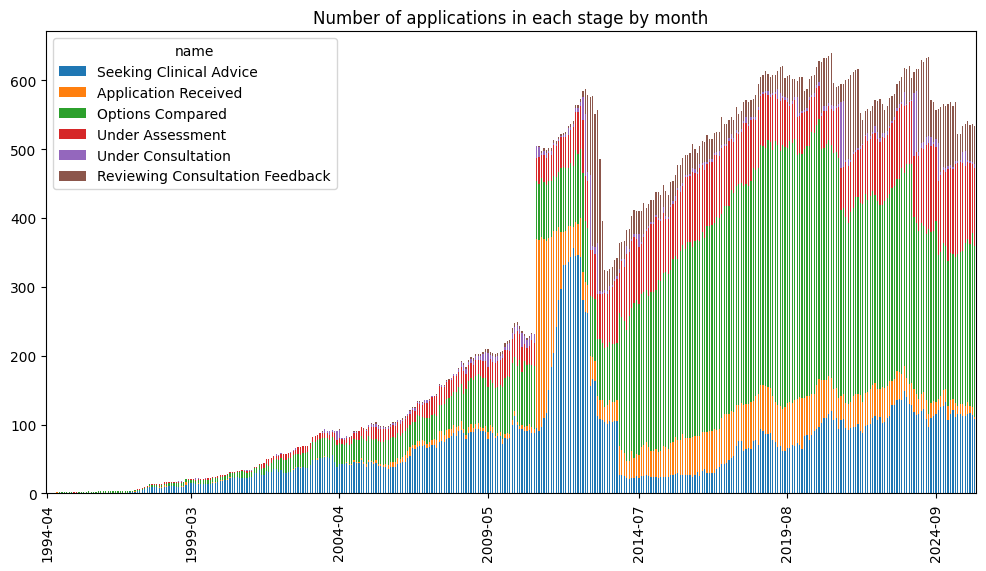

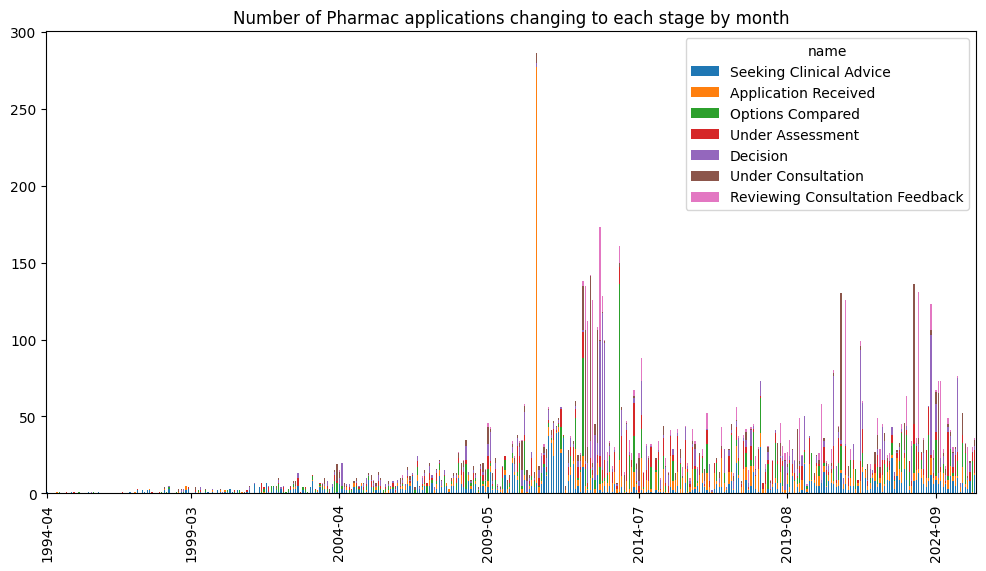

In [17]:
by_month = []
changing_by_month = []
for month in pd.date_range(events.date.min(), events.date.max(), freq="M"):
    counts = events[events.month <= month.to_period("M")].groupby("id").last().name.value_counts()
    by_month.append(counts)
    counts = events[events.month == month.to_period("M")].groupby("id").last().name.value_counts()
    changing_by_month.append(counts)
by_month = pd.DataFrame(by_month, index=pd.date_range(events.date.min(), events.date.max(), freq="M").to_period("M"))
by_month.plot(figsize=(12, 6), title="Number of Pharmac applications in each stage by month")
by_month.drop(columns="Decision").plot(figsize=(12, 6), title="Number of undecided Pharmac applications in each stage by month")
ax = by_month.drop(columns="Decision").plot.bar(stacked=True, figsize=(12, 6), title="Number of applications in each stage by month")
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

changing_by_month = pd.DataFrame(changing_by_month, index=pd.date_range(events.date.min(), events.date.max(), freq="M").to_period("M"))
ax = changing_by_month.plot.bar(stacked=True, figsize=(12, 6), title="Number of Pharmac applications changing to each stage by month")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

/tmp/ipykernel_116943/3258812534.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for month in pd.date_range(events.date.min(), events.date.max(), freq="M"):
/tmp/ipykernel_116943/3258812534.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  by_month = pd.DataFrame(by_month, index=pd.date_range(events.date.min(), events.date.max(), freq="M").to_period("M"))
/tmp/ipykernel_116943/3258812534.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  changing_by_month = pd.DataFrame(changing_by_month, index=pd.date_range(events.date.min(), events.date.max(), freq="M").to_period("M"))


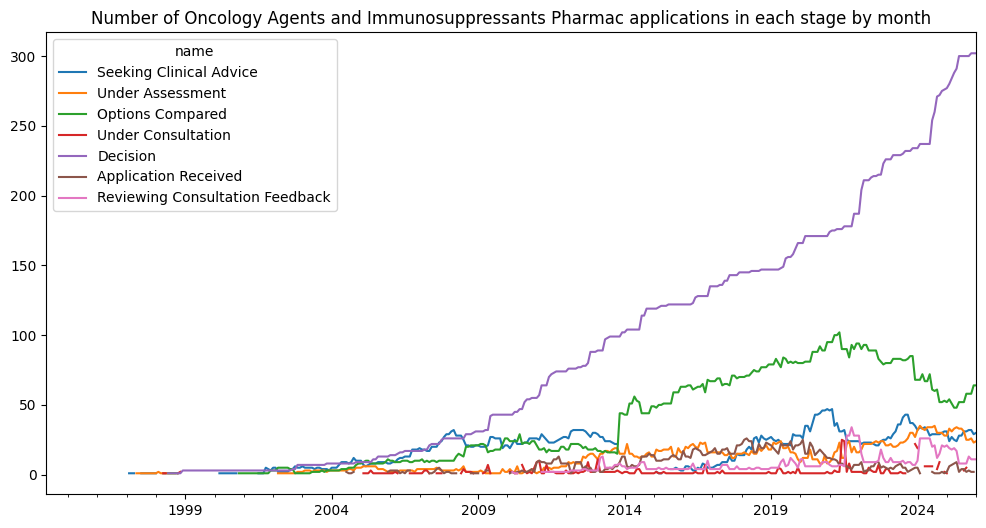

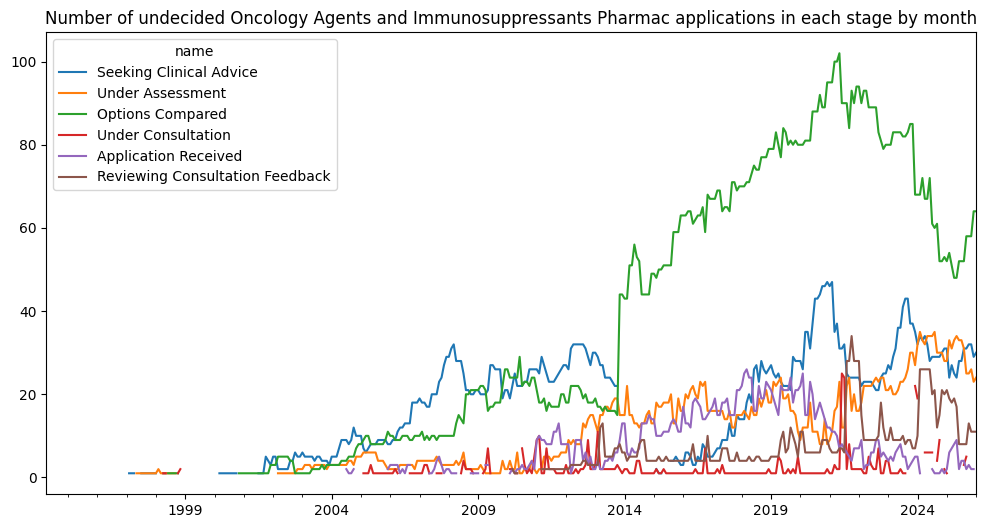

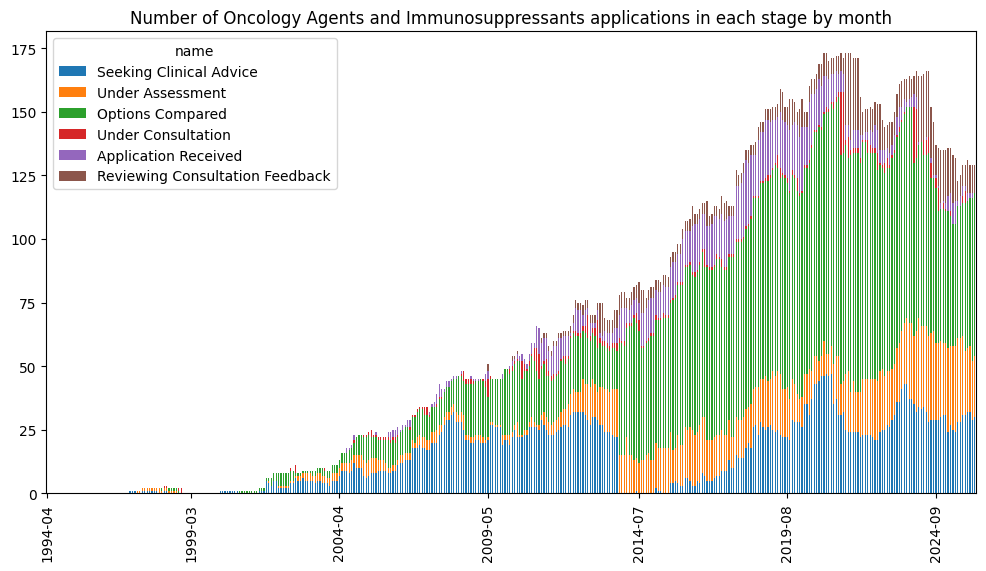

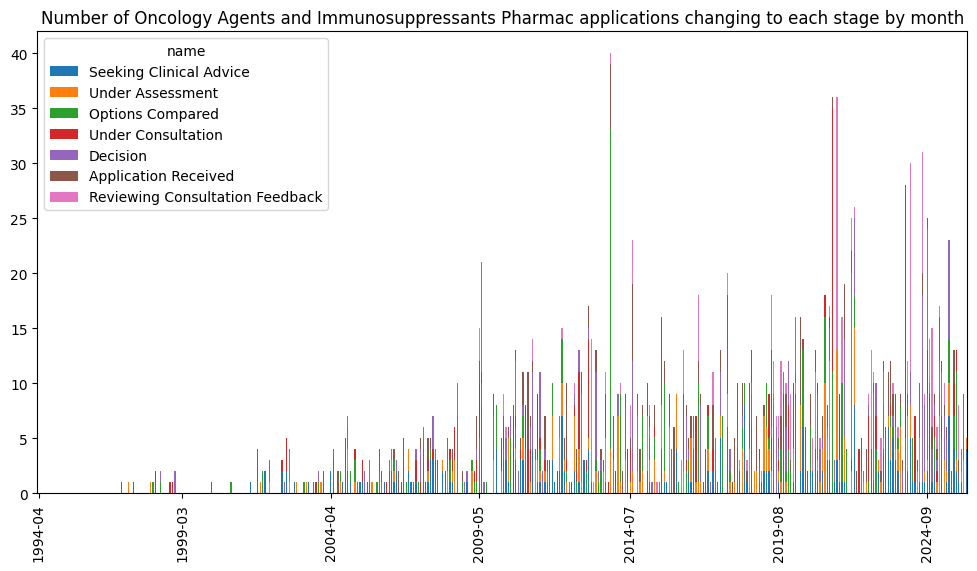

In [19]:
ids = df.Id[df.Therapeutic_group__c == "Oncology Agents and Immunosuppressants"]
by_month = []
changing_by_month = []
for month in pd.date_range(events.date.min(), events.date.max(), freq="M"):
    counts = events[(events.month <= month.to_period("M")) & (events.id.isin(ids))].groupby("id").last().name.value_counts()
    by_month.append(counts)
    counts = events[(events.month == month.to_period("M")) & (events.id.isin(ids))].groupby("id").last().name.value_counts()
    changing_by_month.append(counts)
by_month = pd.DataFrame(by_month, index=pd.date_range(events.date.min(), events.date.max(), freq="M").to_period("M"))
by_month.plot(figsize=(12, 6), title="Number of Oncology Agents and Immunosuppressants Pharmac applications in each stage by month")
by_month.drop(columns="Decision").plot(figsize=(12, 6), title="Number of undecided Oncology Agents and Immunosuppressants Pharmac applications in each stage by month")
ax = by_month.drop(columns="Decision").plot.bar(stacked=True, figsize=(12, 6), title="Number of Oncology Agents and Immunosuppressants applications in each stage by month")
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

changing_by_month = pd.DataFrame(changing_by_month, index=pd.date_range(events.date.min(), events.date.max(), freq="M").to_period("M"))
ax = changing_by_month.plot.bar(stacked=True, figsize=(12, 6), title="Number of Oncology Agents and Immunosuppressants Pharmac applications changing to each stage by month")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())